# Functional Underpinnings of Reading
**Author**: Noelani Luckas

*Student ID*: 2852989 

**Date**: XX_11_2024 


**Link**: [Neurosynth: Reading](https://neurosynth.org/analyses/terms/reading/)



### Step 1: Download fMRI Data 

Download Neurosynth-Reading data at [Neurosynth: Reading](https://neurosynth.org/analyses/terms/reading/).




### Step 2: Set up Conda Environment

1) Set up conda environment by opening a new terminal and creating "assign_neurosynth" environment and activate it (*conda create -n assign_neurosynth python=3.12.4 -y && conda activate assign_neurosynth*)
2) Within activated conda environment, *pip install nilearn nibabel matplotlib pandas scipy*

### Step 3: Write your Code

#### Import ***os*** and ***glob*** 

Firstly, import ***os*** to work with the file directories and ***glob*** to search for the exact path name of the file currently worked within.

Then, use os.getcwd() to receive the current working directory ("Homeassign_Prog") and set it as the base directory for the later code. Furthermore, os.path.join enables creation of a path that is not hardwired and, thus, usable on other operating systems. Here, create a folder that holds the MRI data, adding the files found through globglob with the extension "*.nii" for the neurosynth data. 

Moreover, create a file_path dictionary to store the files in. To make sure everything is working intended, print the filenames out. Finally, name anatomical_file for the ***structural MRI data*** and uniformity_file for the ***functional MRI data***.

In [1]:
import os
import glob

# Current directory as base directory ("HomeAssignment_Prog")
base_dir = os.getcwd()

# MRI data folder
mri_folder = os.path.join(base_dir, "Neurosynth_Reading")

# Locate MRI files and add to MRI folder
mri_files = glob.glob(os.path.join(mri_folder, "*.nii"))

# Dictionary for file paths
file_paths = {}
for file_path in mri_files:
    file_name = os.path.basename(
        file_path
    )  # Extract file name (e.g., "anatomical_reading.nii")
    file_paths[file_name] = file_path

# Print paths
print("Located MRI files:")
for name, path in file_paths.items():
    print(f"{name}: {path}")

# Name paths
anatomical_file = file_paths["anatomical_reading.nii"]
uniformity_file = file_paths["uniformity_reading.nii"]

Located MRI files:
anatomical_reading.nii: /Users/noelani/Downloads/Programming_Psychologist_Course/HomeAssignment_Prog/Neurosynth_Reading/anatomical_reading.nii
uniformity_reading.nii: /Users/noelani/Downloads/Programming_Psychologist_Course/HomeAssignment_Prog/Neurosynth_Reading/uniformity_reading.nii


#### Import Nilearn and Nibabel

Import the important packages from ***nilearn*** and ***nibabel***. 

Also, load the previously created files (anatomical_file and uniformity_file) using nibabel (nib). These are named anat_img for the background of the visualization later, and func_img for the overlay later. 

In [2]:
import nibabel as nib
from nilearn import plotting
from nilearn import image

In [3]:
# Background
anat_img = nib.load(anatomical_file)

# Overlay
func_img = nib.load(uniformity_file)

#### Plot your data
Plot the data that was just loaded. As mentioned, the functional MRI data (func_img) serves as the overlay to the anatomical background (anat_img). 

1) To set the *anat_img* as the background, define bg_img=anat_img. 
2) Set a title.
3) Change the color map to jet (cmap="jet") to dampen the stark colors.
4) Set the threshold for significance to 0.1. Values below this level will be excluded. 
5) Although these are the default values, set display_mode to "ortho" to make sure that three slices of the brain are shown (coronal, sagittal, and axial). 
6) Add the coordinates in which the cut is shown (again, the values are the same as in default, but to be certain they are visualized correclty in other operating systems, they are included). 
7) Similarly, set draw_cross=True to ensure the center of activity is visualized. If the image is preferred without the center crossing, then set draw_cross=False. 
8) Finally, although this is also the default value, set the background to black (black_bg=True) to ensure that there is a contrast between the visualization and the background.


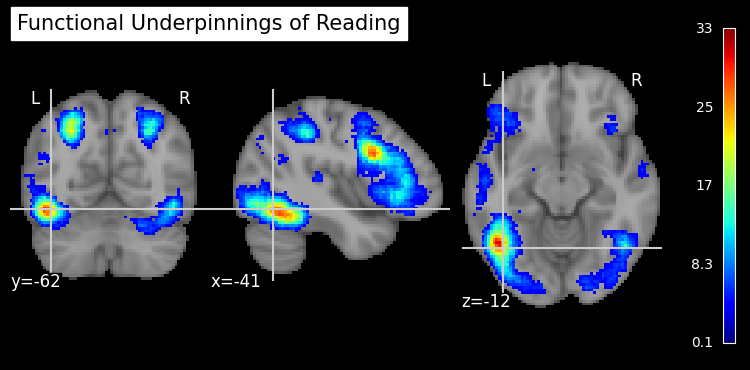

In [4]:
plotting.plot_stat_map(uniformity_file, 
                       bg_img=anatomical_file,
                       title="Functional Underpinnings of Reading",
                       cmap="jet",
                       threshold=0.1,
                       display_mode="ortho",
                       cut_coords=(-41, -62, -12),
                       draw_cross=True,
                       black_bg=True)
plotting.show()


#### Visualize in a histogram

Import ***numby*** and ***matplotlib*** and load the uniformity file (= functional data). Use get_f.data() on the functional data to create a NumPy array and only select positive values. Plot the histogram with desired customizations (s.b.)


##### Desired customizations: 
1) Adjust the figure size to fit the behavior of the data. 
2) Create appropriate number of bins for the visualized data (here, bin=20). Also add the color of the bins (color ="b") as well as their edgecolor (edgecolor ="darkorange") to fit the jet theme of the aforeshown fMRI visualization. 
3) Set the title to "Positive Values in Functional Data". Adjust desired font size. 
4) Set the y-label to "Voxel Intensity" and the x-label to "Frequency". Again, adjust desired font size. 
5) Add a grid for better overview. To minimize the overlay, set alpha to 0.5 and use a lined linestyle ("--").
6) Utilize .tight_layout() function to clean up any missing customizations and show plot.


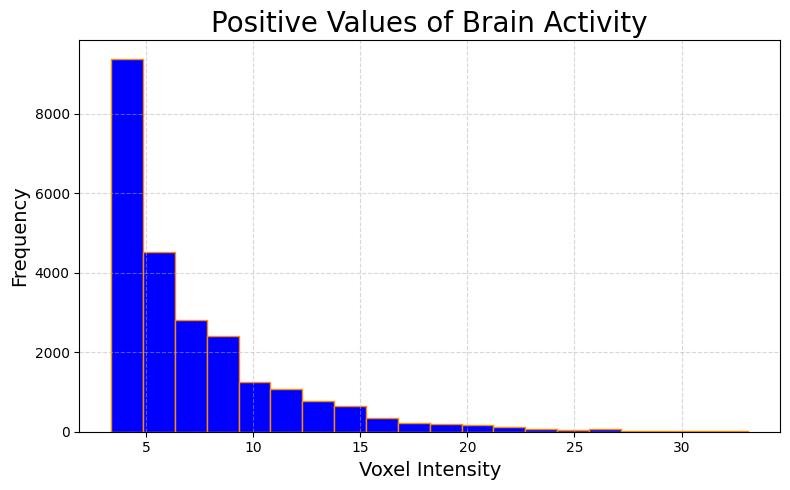

In [5]:
import numpy as np
import matplotlib.pyplot as plt

functional_data = nib.load(uniformity_file)

data_array = functional_data.get_fdata()
positive_values = data_array[data_array > 0]

plt.figure(figsize=(8, 5))
plt.hist(positive_values.ravel(), bins=20, color="b", edgecolor="darkorange")


# Set titles and labels
plt.title("Positive Values of Brain Activity", fontsize=20)
plt.xlabel("Voxel Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add grid
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

### Step 4: Upload Code to GitHub

1) go to www.github.com and open a new repository. Name it "neurosynth-project" or any other preferable name. 
2) In a new terminal, clock on the plus sign and click "bash" (or Git Bash in Windows). Now, clone the new repository into your terminal using the URL (git clone URL.git)
3) Commit changes to local repo and push into GitHub repo. 
4) Within GitHub, go to pull requests and create pull requests. Set title, write a message, and commit. 
